In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('train (3).csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df=pd.read_csv('train (3).csv',usecols=['Survived','Age','Fare'])

In [5]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [8]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\iaman\AppData\Local\Temp\ipykernel_20696\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [9]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\iaman\AppData\Local\Temp\ipykernel_20696\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [10]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [11]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
!pip install matplotlib
import matplotlib.pyplot as plt

In [15]:
import scipy.stats as stats

In [16]:
!pip install seaborn
import seaborn as sns

sns.distplot() → Seaborn ka function hai jo distribution (histogram + density curve) draw karta hai.
Yaha tum X_train['Age'] column ka distribution plot kar rahe ho.Ye tumhe Probability Density Function (PDF) ka ek estimate dikhata hai.
👉 Matlab: Ye plot tumhe batayega ki training dataset me Age kis tarah distribute hai (bell curve jaisa ya skewed).

Ye QQ Plot (Quantile-Quantile plot) banata hai. stats.probplot data ke quantiles ko compare karta hai ek theoretical normal distribution ke quantiles ke sath. Agar data normal distribution follow karta hai, to sare points roughly diagonal straight line pe honge.
Agar data skewed hai ya normal nahi hai → points line se dur chale jayenge.
👉 Matlab: Ye ek visual normality test hai.

C:\Users\iaman\AppData\Local\Temp\ipykernel_20696\2851319815.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


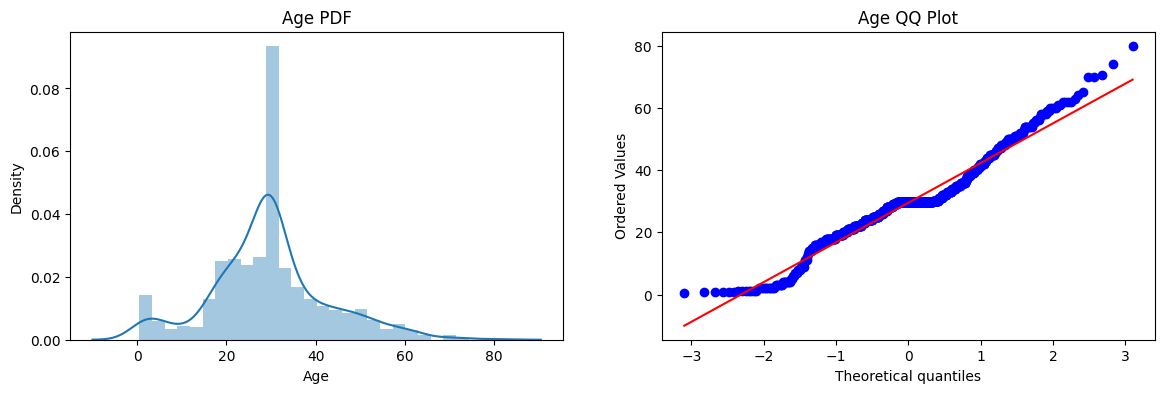

In [18]:
plt.figure(figsize=(14,4))
plt.subplot(121) #subplot grid create karo (1 row, 2 columns, aur ye 1st plot hoga). Yani tum ek hi figure me do plots side by side bana rahe ho.
sns.distplot(X_train['Age'])
plt.title('Age PDF')
plt.subplot(122)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ Plot')
plt.show()

C:\Users\iaman\AppData\Local\Temp\ipykernel_20696\2718719082.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


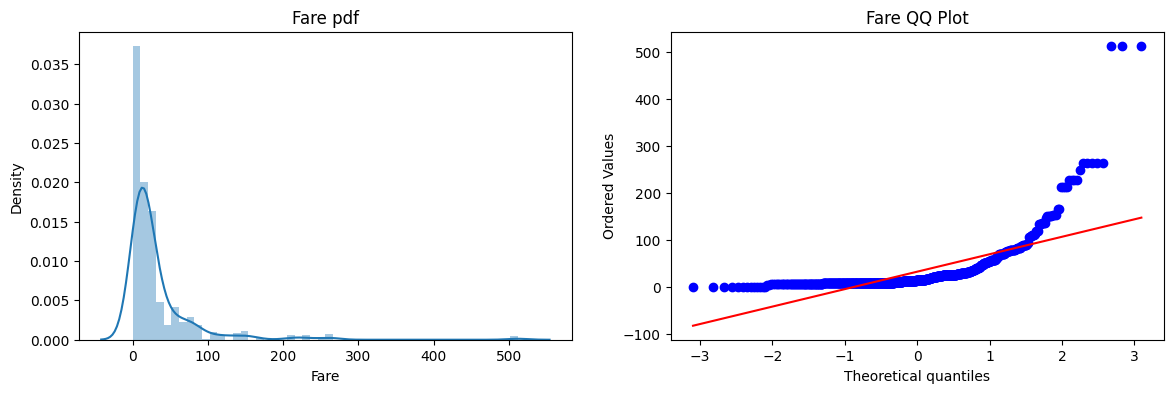

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare pdf')
plt.subplot(122)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title('Fare QQ Plot')
plt.show()

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
Dtree=DecisionTreeClassifier()

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
Lreg=LogisticRegression()

In [24]:
Dtree.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [25]:
Lreg.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [26]:
y_pred=Dtree.predict(X_test)
y_pred2=Lreg.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
acc1=accuracy_score(y_pred,y_test)
acc2=accuracy_score(y_pred,y_test)

In [29]:
acc1

0.6703910614525139

In [30]:
acc2

0.6703910614525139

In [31]:
from sklearn.preprocessing import FunctionTransformer

trf = FunctionTransformer(func=<function_name>)

Yaha tumne ek transformer object banaya.
np.log1p(x) → ye function apply karega data pe.

log1p matlab:
log(1+x) (Isliye use karte hain kyunki agar kisi feature me 0 value hai to log(0) undefined ho jata hai. log1p uss problem ko handle karta hai.)
👉 Matlab: Tum ek Log Transformation kar rahe ho data pe.

In [34]:
trf=FunctionTransformer(func=np.log1p)

In [35]:
X_train_transformed=trf.fit_transform(X_train)

In [36]:
X_test_transformed=trf.transform(X_test)

### Why use log1p transformation?
Skewed Data ko Normal jaisa banana . Bohot baar dataset me kuch features (jaise Age, Salary, Price) highly skewed hote hain.
Log transform unhe bell-shaped curve ke paas le aata hai → normal distribution ke assumptions satisfy hote hain.
Variance Stabilization - Agar feature ka spread bahut zyada ho (ek feature me values 1-1000, doosre me 0.01-0.9) → log transform usko compress kar deta hai.
Machine Learning Algorithms me Improvement
Linear Regression, Logistic Regression jaise models assume karte hain ki input features roughly normal distributed hain.
Log transformation se performance improve hoti hai.

In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import FunctionTransformer

# Fake data
X_train1 = pd.DataFrame({"Income":[1000, 2000, 3000, 50000, 100000]})
X_test1  = pd.DataFrame({"Income":[1200, 3500, 70000]})

# Transformer
trf = FunctionTransformer(func=np.log1p)

X_train_transformed1 = trf.fit_transform(X_train1)
X_test_transformed1 = trf.transform(X_test1)

print("Original Train:\n", X_train1)
print("Transformed Train:\n", X_train_transformed1)
print("Transformed Test:\n", X_test_transformed1)

Original Train:
    Income
0    1000
1    2000
2    3000
3   50000
4  100000
Transformed Train:
       Income
0   6.908755
1   7.601402
2   8.006701
3  10.819798
4  11.512935
Transformed Test:
       Income
0   7.090910
1   8.160804
2  11.156265


In [39]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6871508379888268


In [80]:
X_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


Logistic Regression normality assumption ke sath better perform karta hai → log transform help karta hai.
Decision Tree distribution pe dependent nahi hota → transformation se zyada farak nahi padta.

In [85]:
from sklearn.model_selection import cross_val_score

In [89]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6621972534332086


Solution → Cross Validation. Cross-validation ek resampling technique hai jisme dataset ko alag-alag parts (folds) me todke model ko baar-baar train & test kiya jata hai. 👉 Matlab: Tum ek hi data ko multiple times training + testing ke liye use karte ho, but smart way me.

#np.mean(cross_val_score(clf, X_transformed, y, scoring='accuracy', cv=10))
cross_val_score = sklearn ka function jo cross-validation karta hai.
Parameters:clf: model (yaha Logistic Regression).
X_transformed: features (log transformed data).
y: target labels. scoring='accuracy': performance metric → accuracy.
cv=10: 10-fold cross validation (dataset ko 10 equal folds me todta hai).
Output: ek list of 10 accuracy values (har fold ke liye).
np.mean(...): un sab ka average accuracy nikalta hai → final score.

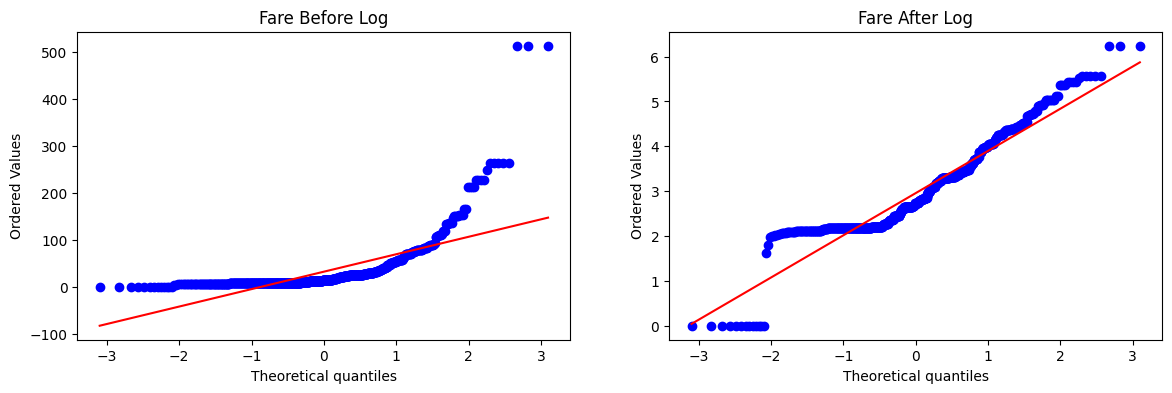

In [96]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

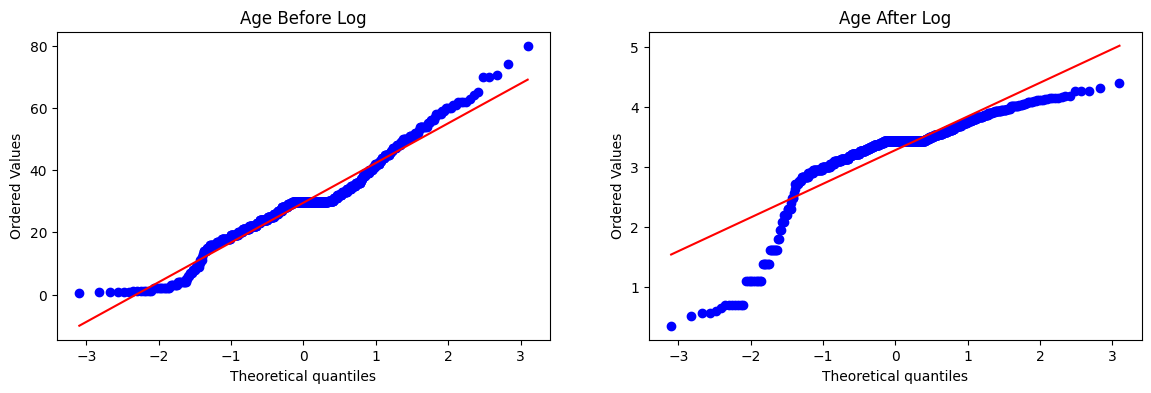

In [98]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [104]:
from sklearn.compose import ColumnTransformer

In [110]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    


Accuracy 0.6195131086142323


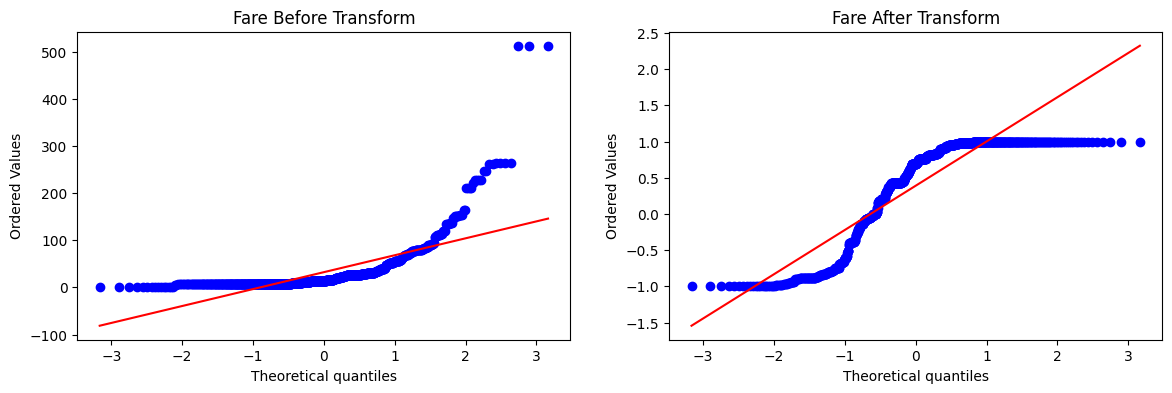

In [112]:
apply_transform(np.sin)